<a href="https://colab.research.google.com/github/oussamaJMAA/PRM-Conceptual-Graphs-Recommendations/blob/main/Figures_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00


In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("object-detection-project-gsdhg").project("figure-detection-bdsph")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.196, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to figure-detection-1 in yolov8:: 100%|██████████| 218/218 [00:00<00:00, 2620.92it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/figure-detection-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=to

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/figure-detection-1/valid/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100% 11/11 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.02s/it]
                   all         11         11      0.834          1      0.973       0.86
Speed: 0.3ms preprocess, 42.8ms inference, 0.0ms loss, 17.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/10 /content/datasets/figure-detection-1/test/images/PMBOK6-2017_page-0073_jpg.rf.439845d04c41a86eae399f27d392d77f.jpg: 800x800 2 figures-in-pdfss, 42.8ms
image 2/10 /content/datasets/figure-detection-1/test/images/PMBOK6-2017_page-0182_jpg.rf.e662724b49eb5981b1098f276f61b11b.jpg: 800x800 1 figures-in-pdfs, 24.7ms
image 3/10 /content/datasets/figure-detection-1/test/images/PMBOK6-2017_page-0191_jpg.rf.f1c5ba73d1464fd25ee5cc26e0c02edf.jpg: 800x800 1 figures-in-pdfs, 24.7ms
image 4/10 /content/datasets/figure-detection-1/test/images/PMBOK6-2017_page-0199_jpg.rf.73797a547c61b2777bafe8708acc35ae.jpg: 800x800 1 figures-in-pdfs, 24.7ms
image 5/10 /content/datasets/figure-detection-1/test/images/PMBOK6-2017_page-0215_jpg.rf.6e653270c9c57a5dab5c54ab244ad8bd.jpg: 800x800 3 figures-in-pdfss, 24.7ms
image 6/10 /co

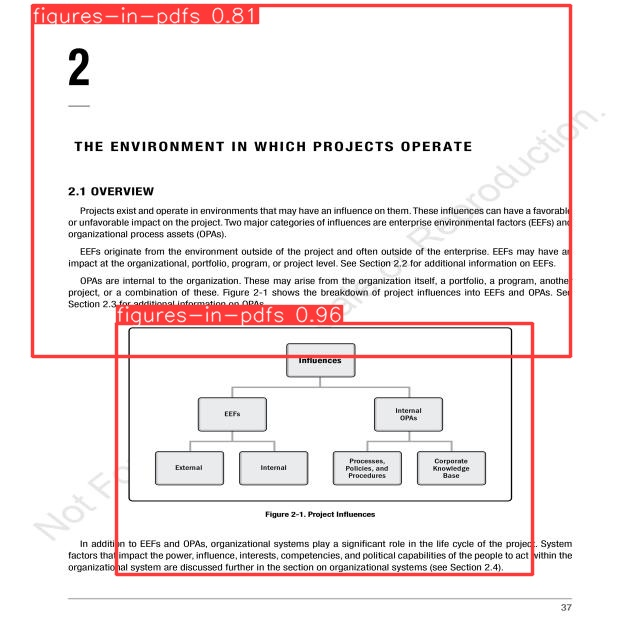

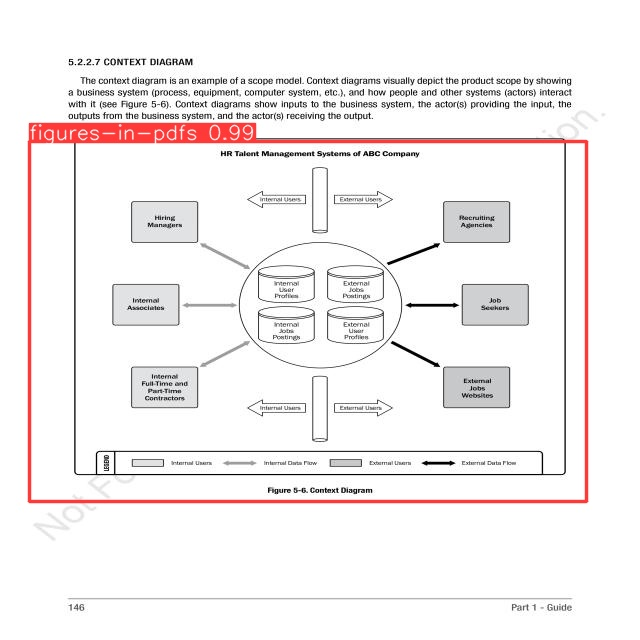

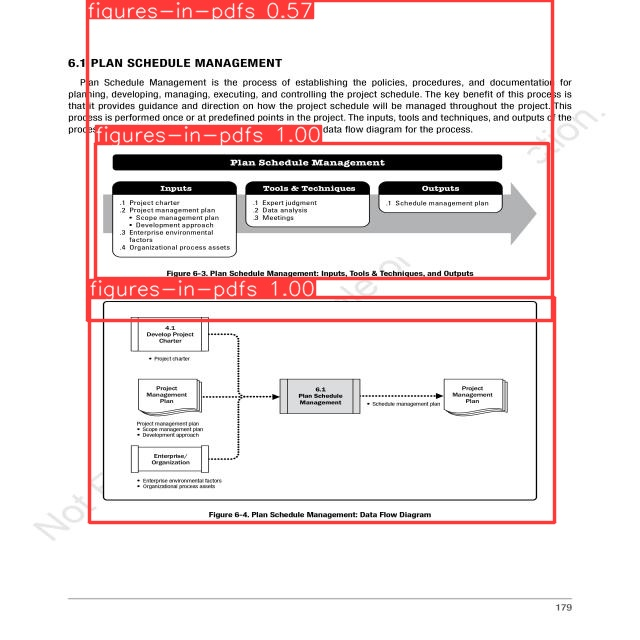

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train2/")

Dependency ultralytics==8.0.134 is required but found version=8.0.196, to fix: `pip install ultralytics==8.0.134`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/object-detection-project-gsdhg/figure-detection-bdsph/1
Share your model with the world at: https://universe.roboflow.com/object-detection-project-gsdhg/figure-detection-bdsph/model/1


In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on PMBOK6-2017_page-0540_jpg.rf.ee9bde16dc790acbf14133e91906773b.jpg


{'predictions': [{'x': 325.0,
   'y': 187.0,
   'width': 512.0,
   'height': 266.0,
   'confidence': 0.9987114071846008,
   'class': 'figures-in-pdfs',
   'class_id': 0,
   'image_path': '/content/datasets/figure-detection-1/test/images/PMBOK6-2017_page-0540_jpg.rf.ee9bde16dc790acbf14133e91906773b.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}